# Author: Mayur Rajendrakumar Ghate
## Task - 2: Prediction using Unsupervised ML
## *Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.*
## The Sparks Foundation
### Graduate Rotational Internship Program (GRIP) June 2021 Batch
### Data Science & Business Analytics Tasks

## Importing the required libraries

In [1]:
# Library
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing dataset

In [2]:
# Reading data from CSV file
df = pd.read_csv('Iris.csv')
print("Data imported successfully")

df.head() # head displayed first 5 rows of data

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# To check the size of data in terms of Row X Columns
df.shape

(150, 6)

In [4]:
# As 'Id' is not useful so i am dropping 'Id' column
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# To check for NaN or Null values
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# To check the info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# To check Mean, Median, Standard Deviation, Min., Max. about the columns in data set
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# To check corelation between columns in data set
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Data Visualization

<AxesSubplot:>

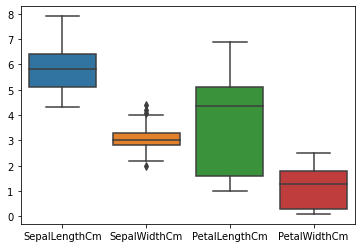

In [9]:
# Plotting Box plot to see the outliers in the data set
sns.boxplot(data=df)

<AxesSubplot:>

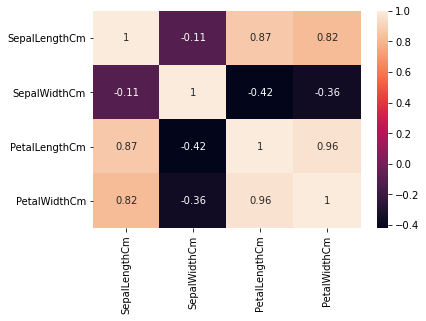

In [10]:
# Correlation throught the visualization
sns.heatmap(df.corr(),annot=True)

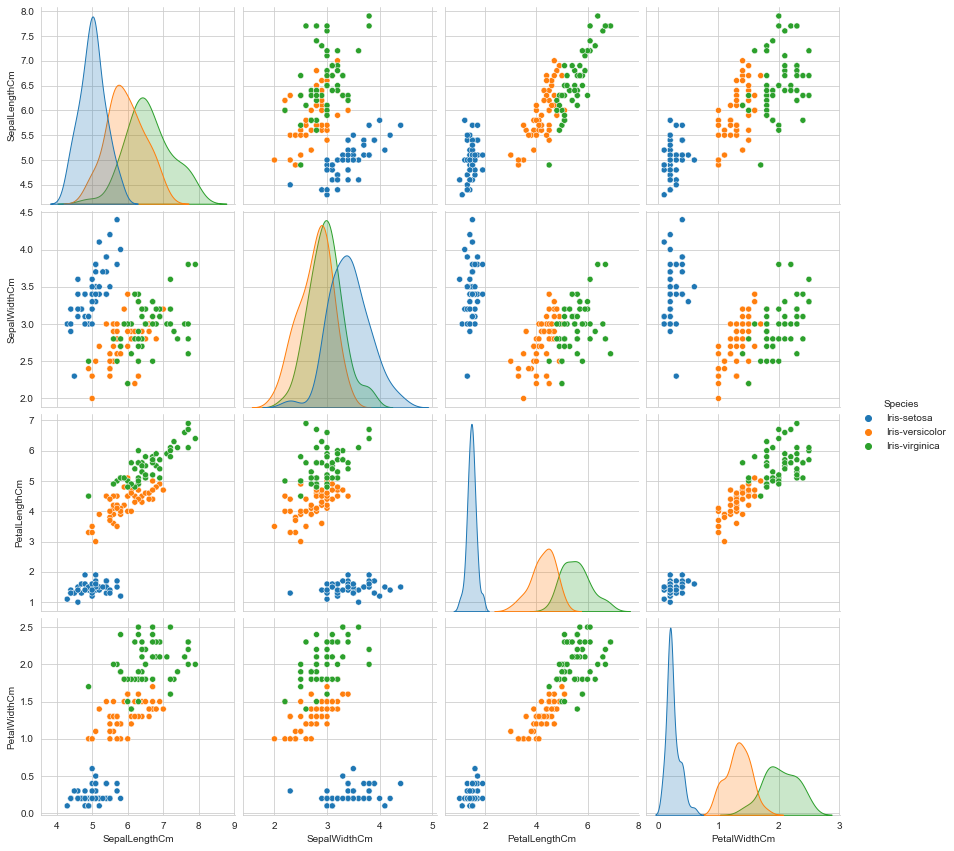

In [11]:
# Pair plot - It is best plot to see relation between columns with each other
sns.set_style('whitegrid')
sns.pairplot(df,hue='Species',height=3)
plt.show()

## Finding the value of K i.e., no. of clusters

C:\Users\ITI Aundh 4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


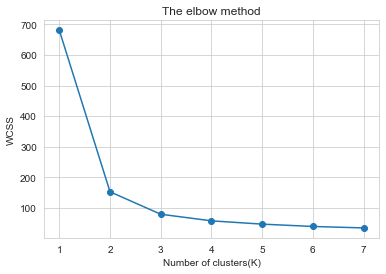

In [12]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 8, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 8), wcss, '-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**From the above graph, the no. of cluster K=3. Because, this is point after that the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

## Training the model

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 8, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=8, random_state=0)

In [14]:
y_kmeans = kmeans.fit_predict(x)

**Visualising the clusters - On the first two columns**

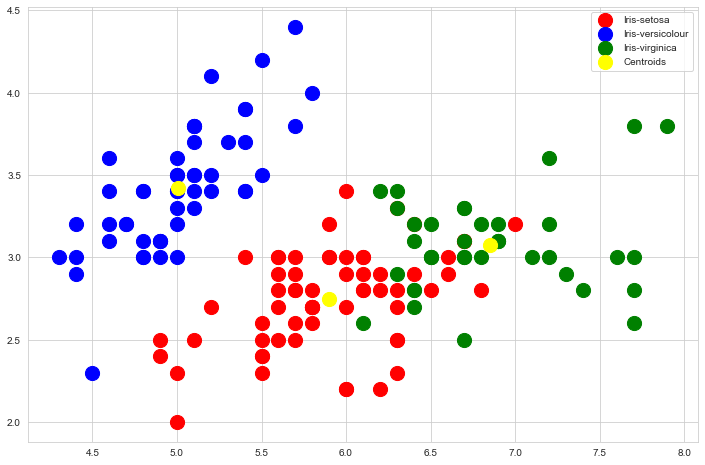

In [15]:
plt.figure(figsize=(12,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 200, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'yellow', label = 'Centroids')

plt.legend(loc=1)

## Validating the Model

**Creating a Dataframe with features & label**

In [16]:
df2 = pd.DataFrame({'labels':y_kmeans,'species':df['Species']})

# Creat crosstab
ctab = pd.crosstab(df2['labels'],df2['species'])
print(ctab)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               48              14
1                 50                0               0
2                  0                2              36


**To cluster more accurately we normalize the data & apply clustering again**

In [17]:
# Necessary library
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
scaler = Normalizer()

x= scaler.fit_transform(x)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

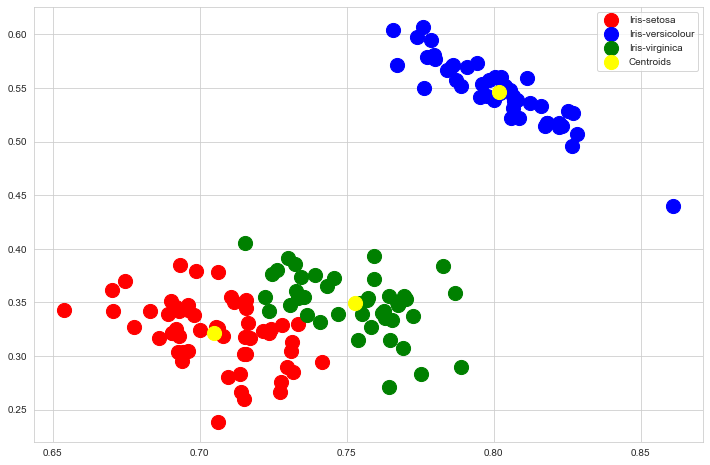

In [18]:
plt.figure(figsize=(12,8))

labels = kmeans.predict(x)

plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 200, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 200, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 200, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'yellow', label = 'Centroids')

plt.legend(loc=1)

**Creating a Dataframe with features & label**

In [19]:
df2 = pd.DataFrame({'labels':labels,'species':df['Species']})

# Creat crosstab
ctab = pd.crosstab(df2['labels'],df2['species'])
print(ctab)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                5              50
1                 50                0               0
2                  0               45               0


In [20]:
# Normalizer have increased the performance of the cluster.

### Conclusion: Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes.

## Thank You